In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm

# Function to calculate Bhattacharyya coefficient
def bhattacharyya_coeff(mean0, cov0, mean1, cov1):
    diff_mean = mean1 - mean0
    Cmean = (cov0 + cov1) / 2
    invCmean = np.linalg.inv(Cmean)
    term1 = np.dot(np.dot(diff_mean.T, invCmean), diff_mean) / 8
    term2 = 0.5 * np.log(np.linalg.det(Cmean) / np.sqrt(np.linalg.det(cov0) * np.linalg.det(cov1)))
    return term1 + term2

# Function to calculate Chernoff bound for a given beta
def chernoff_bound(beta, mean0, cov0, mean1, cov1):
    diff_mean = mean1 - mean0
    term1 = (1-beta) * beta * np.dot(np.dot(diff_mean.T, np.linalg.inv((1-beta)*cov0 + beta*cov1)), diff_mean)
    term2 = 0.5 * np.log(np.linalg.det((1-beta)*cov0 + beta*cov1) / (np.linalg.det(cov0)**(1-beta) * np.linalg.det(cov1)**beta))
    return term1 + term2

In [2]:
mean0 = np.array([-1, -1, -1, -1])
cov0 = np.array([[5, 3, 1, -1], [3, 5, -2, -2], [1, -2, 6, 3], [-1, -2, 3, 4]])
mean1 = np.array([1, 1, 1, 1])
cov1 = np.array([[1.6, -0.5, -1.5, -1.2], [-0.5, 8, 6, -1.7], [-1.5, 6, 6, 0], [-1.2, -1.7, 0, 1.8]])

B_coeff = bhattacharyya_coeff(mean0, cov0, mean1, cov1)
B_bound = np.exp(-B_coeff)

betas = np.linspace(0, 1, 100)
C_bounds = [chernoff_bound(beta, mean0, cov0, mean1, cov1) for beta in betas]
C_bounds_exp = np.exp(-np.array(C_bounds))

# calculating beta that minimizes Chernoff bound
min_C_bound_index = np.argmin(C_bounds_exp)
optimal_beta = betas[min_C_bound_index]
min_C_bound = C_bounds_exp[min_C_bound_index]


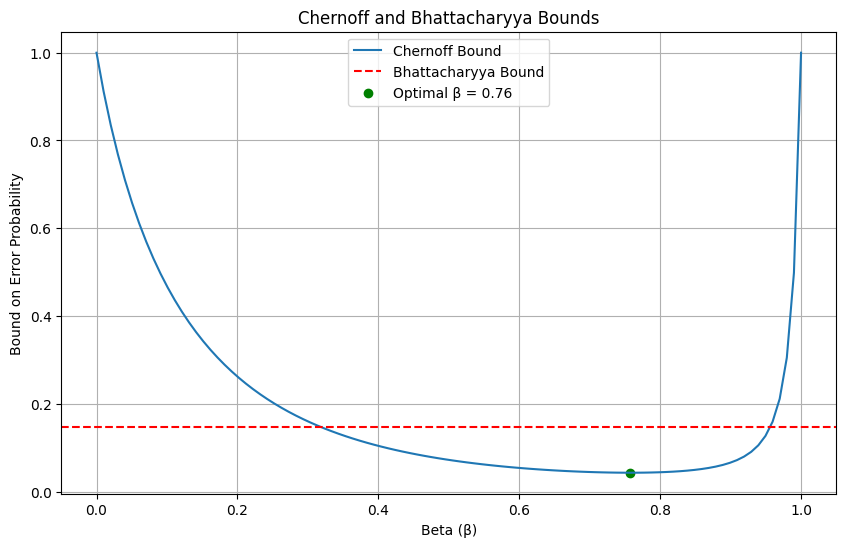

(0.7575757575757577, 0.0429394204750989, 0.1468812172751075)

In [3]:
# Plot Chernoff and Bhattacharyya bounds
plt.figure(figsize=(10, 6))
plt.plot(betas, C_bounds_exp, label='Chernoff Bound')
plt.axhline(y=B_bound, color='r', linestyle='--', label='Bhattacharyya Bound')
plt.scatter(optimal_beta, min_C_bound, color='green', label=f'Optimal β = {optimal_beta:.2f}')
plt.xlabel('Beta')
plt.ylabel('Bound on Error Probability')
plt.title('Chernoff and Bhattacharyya Bounds')
plt.legend()
plt.grid(True)
plt.show()

(optimal_beta, min_C_bound, B_bound)